<h3>May 2020</h3>
205739386<br>
205970783
<h1><center>Problem 3: Practical Part</center></h1>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# PROMO FILE
victory_promo_full_1 = "PromoFull7290696200003-097-202005040319-001.csv"
t_victory_promo_full_1 = pd.read_csv(victory_promo_full_1, encoding="utf-8")

# FULL PRICES FILES
victory_price_full_1 = "PriceFull7290696200003-097-202005040319-001.csv"
t_victory_prices_full_1 = pd.read_csv(victory_price_full_1)

victory_price_full_2 = "PriceFull7290696200003-077-202005040327-001.csv"
t_victory_prices_full_2 = pd.read_csv(victory_price_full_2)

victory_price_full_3 = "PriceFull7290696200003-001-202005040302-001.csv"
t_victory_prices_full_3 = pd.read_csv(victory_price_full_3)

victory_price_full_4 = "PriceFull7290696200003-008-202005040317-001.csv"
t_victory_prices_full_4 = pd.read_csv(victory_price_full_4)

victory_price_full_5 = "PriceFull7290696200003-025-202005040310-001.csv"
t_victory_prices_full_5 = pd.read_csv(victory_price_full_5)

victory_price_full_6 = "PriceFull7290696200003-034-202005040316-001.csv"
t_victory_prices_full_6 = pd.read_csv(victory_price_full_6)

victory_price_full_7 = "PriceFull7290696200003-050-202005040308-001.csv"
t_victory_prices_full_7 = pd.read_csv(victory_price_full_7)

victory_price_full_8 = "PriceFull7290696200003-059-202005040305-001.csv"
t_victory_prices_full_8 = pd.read_csv(victory_price_full_8)

## Question (a)
### Bad Data Example (1): Missing Data
The government guidelines regarding the publishing of prices were intended to promote healthy competition between big supermarkets. Unfortunately, no competition will happen if certain companies will refuse to publish their price list. We're looking at you, Rami Levi.

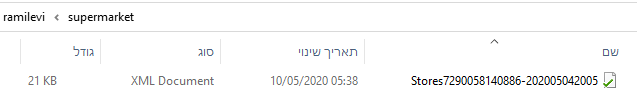

### Bad Data Example (2): Corrupted Files
Do you know what's worse than hiding files? Trying to create the illusion of cooperation - when in reality you're just as bad. Ironically, it smells fishy in Freshmarket.

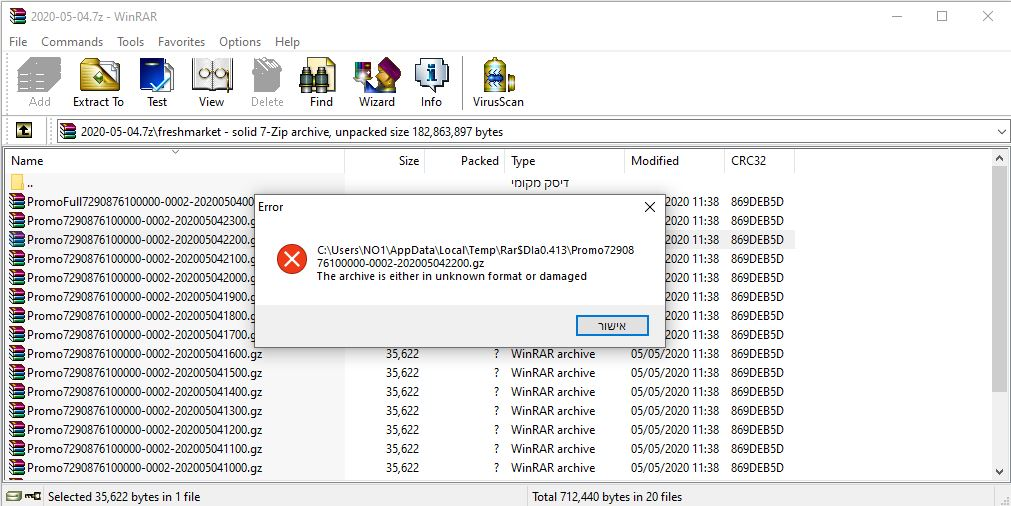

### Bad Data Example (3): Inconsistent 'DiscountRate' Values
After a quick glance at the table, we've noticed inconsistencies in 'DiscountRate'. The guidelines defined it to be the discount rate of the product, written in digits. Let's take a look at the following table:

In [2]:
df = t_victory_promo_full_1.iloc[[0,5,4,2614,358], [10,11,19,22]]
df.head()

,PromotionID,PromotionDescription,DiscountRate,DiscountedPrice
0,105775,2ב10 כוסות שתיה חמה הנמל,0.90,10.0
5,108772,2ב20 פחם 2קג,1.90,20.0
4,108771,3ב10 שיבולת שועל 350 גר,-3.33,10.0
2614,304278,2+1מארז שמייניה,100.00,0.0
358,120081,"79.90סינטה עגל מצונן מחפוד מעל קניה של 100 ש""ח",-79.90,79.9


<center>Table 1: Victory's 'PromoFull7290696200003-097-202005040319-001'</center>

One would have expected that the rate equates to percentage base, but after giving it more thought, we agreed that here, it's actually ILS based. Despite that, It's unclear why the store uses both positive and negative values to describe the same discounts.

### Bad Data Example (4): Duplicates
While trying to pull out different rows based on the product IDs, many of them came along with duplicates. The following snippet shows different rows with identical values:

In [3]:
pd.set_option('display.max_columns', 500)
t_victory_promo_full_1.set_index("PromotionID").loc["210605", 
                                                    ["PromotionDescription", "PromotionStartDate", 
                                                     "PromotionStartHour", "PromotionEndDate", "PromotionEndHour",
                                                     "DiscountedPrice"]]

,PromotionDescription,PromotionStartDate,PromotionStartHour,PromotionEndDate,PromotionEndHour,DiscountedPrice
PromotionID,,,,,,
210605,9.90סושי מגוון,2020/05/03,06:00:00,2020/05/30,23:59:00,9.9
210605,9.90סושי מגוון,2020/05/03,06:00:00,2020/05/30,23:59:00,9.9
210605,9.90סושי מגוון,2020/05/03,06:00:00,2020/05/30,23:59:00,9.9
210605,9.90סושי מגוון,2020/05/03,06:00:00,2020/05/30,23:59:00,9.9
210605,9.90סושי מגוון,2020/05/03,06:00:00,2020/05/30,23:59:00,9.9
210605,9.90סושי מגוון,2020/05/03,06:00:00,2020/05/30,23:59:00,9.9
210605,9.90סושי מגוון,2020/05/03,06:00:00,2020/05/30,23:59:00,9.9
210605,9.90סושי מגוון,2020/05/03,06:00:00,2020/05/30,23:59:00,9.9
210605,9.90סושי מגוון,2020/05/03,06:00:00,2020/05/30,23:59:00,9.9


<center>Table 2: Victory's 'PromoFull7290696200003-097-202005040319-001'</center>

### Bad Data Example (5): Missing Values
We started by inspecting some categories with missing values.

In [4]:
res = t_victory_prices_full_1.isna().any()
res[res].index

Index(['ManufactureCountry', 'ManufactureItemDescription', 'UnitMeasure',
       'LastUpdateDate', 'LastUpdateTime'],
      dtype='object')

When examined the unit measurement category, we discovered that there were 5 unique ones, along with "NaN" for an empty cell.

In [5]:
df = t_victory_prices_full_1["UnitMeasure"]
categories = pd.Series(df, dtype="category").unique()
print(categories)

[NaN, 100 גרם, 1 ק"ג, 100 מ"ל, יח`, 1 ליטר]
Categories (5, object): [100 גרם, 1 ק"ג, 100 מ"ל, יח`, 1 ליטר]


But, there's a general category to describe anything that is not sold by metric quantity - "a single package". Why, then, it's not being used to describe the rest of the missing values?

In [6]:
df1 = t_victory_prices_full_1.set_index("ItemCode")
df1.loc[[7359, 7472, 555501, 9771570000000], ["ItemName", "UnitMeasure"]].head()

,ItemName,UnitMeasure
ItemCode,,
7359,אווזית עגל טרי מוכשר,"1 ק""ג"
7472,אנטריקוט עגל טרי מוכשר סטייק,NaN
555501,פיקדון 0.30 בקבוק(בודד),יח`
9771570000000,ידיעות שבת,NaN


<center>Table 3: Victory's 'PriceFull7290696200003-097-202005040319-001'</center>

### Bad Data Example (6): Inconsistent Naming
Sometimes the manufacture's name is written before the product, and sometimes after. The description is also inconsistent and vague: it's not clear what "מוביל" means. The IDs were gathered by a simple word search in the database: "חזה הודו".

In [7]:
pd.set_option('display.max_columns', 500)
df = t_victory_prices_full_2
df1 = df.set_index("ItemCode")
df1.loc[[2206408, 2225942, 318288], "ItemName"].head()

ItemCode
2206408    חזה הודו נקבה טרי ארוז מוביל
2225942        מחפוד חזה הודו נקבה ארוז
318288              חזה הודו בדבש יחיעם
Name: ItemName, dtype: object

### Bad Data Example (7): Combining Names & Numbers Under the Same Category 
When printing the first table, some of the first values under the "manufacture names" were numbers. We then searched for the item ID in a diffrenet table, and found a match, but this time with a name. The meaning of the numbers is unclear (it's not a phone number, we've checked!)

In [8]:
ManufactureName1 = pd.DataFrame(t_victory_prices_full_1, columns=["ItemCode", "ManufactureName", "ItemName"])
ManufactureName2 = pd.DataFrame(t_victory_prices_full_2, columns=["ItemCode", "ManufactureName", "ItemName"])
print(ManufactureName1.iloc[8], "\n\n", ManufactureName2.iloc[7])

ItemCode              2007
ManufactureName    *205195
ItemName              בטטה
Name: 8, dtype: object 

 ItemCode                              2007
ManufactureName    החקלאי תלמי אל-בועז חדד
ItemName                              בטטה
Name: 7, dtype: object


## Problem 3: Question (b)
As a warm-up, we can look at the average price in some stores in Victory's supermarket chain. We would expect to see minor differences in each store. We have two reasons to assume so: firstly, each store caters to a different population, with different financial means. It's logical they would charge more in Tel-Aviv, than in Modi'in. Secondly, prices are bound by competition, and customers, which can tolerate some price difference in their store, would be angered if it would be too great. taking into consideration the amount of traffic these stores have, even minor changes in the average item price will account for great sums of profit overall.

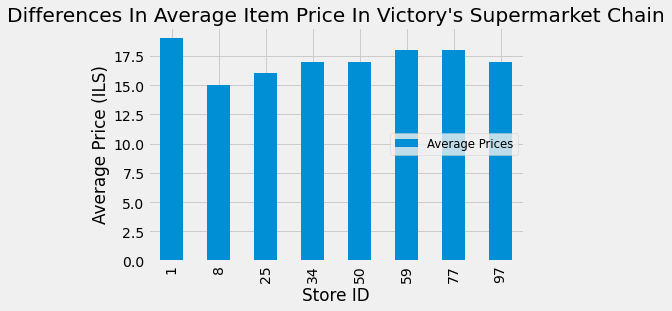

In [13]:
# Calculating the average prices for each file
v001_avg = pd.DataFrame(t_victory_prices_full_3,  columns=["ItemPrice"]).mean()
v008_avg = pd.DataFrame(t_victory_prices_full_4,  columns=["ItemPrice"]).mean()
v025_avg = pd.DataFrame(t_victory_prices_full_5,  columns=["ItemPrice"]).mean()
v034_avg = pd.DataFrame(t_victory_prices_full_6,  columns=["ItemPrice"]).mean()
v050_avg = pd.DataFrame(t_victory_prices_full_7,  columns=["ItemPrice"]).mean()
v059_avg = pd.DataFrame(t_victory_prices_full_8,  columns=["ItemPrice"]).mean()
v077_avg = pd.DataFrame(t_victory_prices_full_2,  columns=["ItemPrice"]).mean()
v097_avg = pd.DataFrame(t_victory_prices_full_1,  columns=["ItemPrice"]).mean()

# Parsing the data
V_Avg_Data = { "Average Prices": [v001_avg, v008_avg, v025_avg, v034_avg, v050_avg, v059_avg, v077_avg, v097_avg],
        "Store ID": [1, 8, 25, 34, 50, 59, 77, 97]
       }
victory_avg_df = pd.DataFrame(V_Avg_Data, columns=['Average Prices','Store ID']).astype(int)

victory_avg_df.plot(x ='Store ID', y='Average Prices', kind = 'bar')

# Matplotlib
plt.title("Differences In Average Item Price In Victory's Supermarket Chain")
plt.xlabel("Store ID")
plt.ylabel("Average Price (ILS)")
plt.style.use("fivethirtyeight")
plt.legend(loc='center right', fontsize="small")

plt.show()

Now we know the average price of an item is somewhere around 15-20 ILS. If we create a histogram of all the different prices in a store, we would expect to see the longest lines closer to the average. Indeed, an average can be misleading, since we can have 100 ILS by having 100 items at this price, or by having 50 products at 1 ILS, and 50 at 199 ILS.
We're basing our assumption firstly based on the fact that the average is close to the 0 ILS mark, so prices can't range more than 20 ILS further down the axis. Also, most of the store items are selling around this price - it's more common to find and item priced at 20 ILS than 5 or 50 ILS.

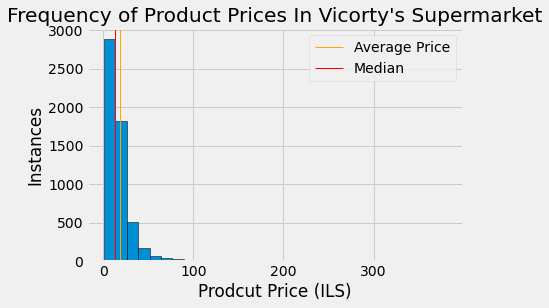

In [10]:
# Histogram's Data
v077_df = t_victory_prices_full_2["ItemPrice"]
prices_data = v077_df.tolist()
v077_avg = float(v077_df.mean())
v077_med = float(v077_df.median())

# Matplotlib
plt.title("Frequency of Product Prices In Vicorty's Supermarket")
plt.xlabel("Prodcut Price (ILS)")
plt.ylabel("Instances")
plt.style.use("fivethirtyeight")
plt.axvline(v077_avg, color="orange", label="Average Price", linewidth=1)
plt.axvline(v077_med, color="red", label="Median", linewidth=1)
plt.legend()


plt.hist(prices_data, bins=30, edgecolor="black")
plt.show()

From here, we can zoom in on the prices between 0-100:

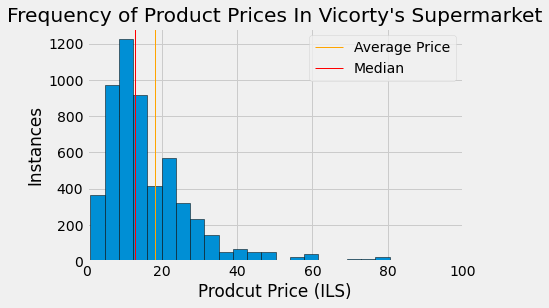

In [11]:
plt.xlim(0, 100)

# Matplotlib
plt.title("Frequency of Product Prices In Vicorty's Supermarket")
plt.xlabel("Prodcut Price (ILS)")
plt.ylabel("Instances")
plt.style.use("fivethirtyeight")
plt.axvline(v077_avg, color="orange", label="Average Price", linewidth=1)
plt.axvline(v077_med, color="red", label="Median", linewidth=1)
plt.legend()

plt.hist(prices_data, bins=100, edgecolor="black")
plt.show()

Seems like we were a little off with our assumptions (average is tricky indeed!). We were correct to assume that most of the prices are in the same range (which is around 5-20). The reason for the difference between the median and average is caused by the more expensive items in the store. We see some of the hidden ranges, when we use the log option on the histogram, like so:

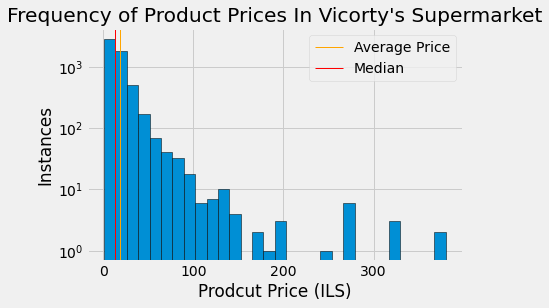

In [12]:
# Matplotlib
plt.title("Frequency of Product Prices In Vicorty's Supermarket")
plt.xlabel("Prodcut Price (ILS)")
plt.ylabel("Instances")
plt.style.use("fivethirtyeight")
plt.axvline(v077_avg, color="orange", label="Average Price", linewidth=1)
plt.axvline(v077_med, color="red", label="Median", linewidth=1)

plt.legend()


plt.hist(prices_data, bins=30, edgecolor="black", log=True)
plt.show()

We would like to point that since we're changing only the y-axis by a logarithmic scale, the proportions are not symmetrical. We cannot assume how many instances each bin has, based on looks alone, only to use it to find some anomalies, and "missed" data.